# [2. Accessing Text Corpora and Lexical Resources](https://www.nltk.org/book/ch02.html)

Run the cell below before running the examples.

In [7]:
import nltk

## 1.

☼ Create a variable `phrase` containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [6]:
phrase = ["My", "phrase", "is", "this"]

In [8]:
# addition
phrase + ["one"]

['My', 'phrase', 'is', 'this', 'one']

In [9]:
# multiplication
phrase * 2

['My', 'phrase', 'is', 'this', 'My', 'phrase', 'is', 'this']

In [ ]:
# indexing
phrase[1]

In [13]:
# slicing
phrase[-2:]

['is', 'this']

In [18]:
# sorting
sorted(phrase)

['My', 'is', 'phrase', 'this']

## 2.

☼ Use the corpus module to explore `austen-persuasion.txt`. How many word tokens does this book have? How many word types?

* refer to section 1.2 for exploring Gutenberg corpus
* refer to Chapter 1, section 1.4 for **word types**

In [3]:
from nltk.corpus import gutenberg

ap = gutenberg.words('austen-persuasion.txt')

In [6]:
# number of tokens

len(ap)

98171

In [7]:
# number of word types (unique words)

len(set(ap))

6132

## 3.

☼ Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [12]:
nltk.corpus.brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [5]:
nltk.corpus.webtext.words()

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

## 4

☼ Read in the texts of the *State of the Union addresses*, using the `state_union` corpus reader. Count occurrences of 'men', 'women', and 'people' in each document. What has happened to the usage of these words over time?

### Solution

This problem requires creating a **cumulative frequency diagram** (refer to *section 2*).

For this solution, I used `word.lower()` to account for occurances of upper-case letters at the beginning of some words.

In [33]:
from nltk.corpus import state_union

cfd = nltk.ConditionalFreqDist(
    (docu, word.lower())
    for docu in state_union.fileids()
    for word in state_union.words(fileids=[docu]) if word.lower() in ["men", "women", "people"]
)

In [25]:
cfd.tabulate()

                       men people  women 
    1945-Truman.txt      2     10      2 
    1946-Truman.txt     12     49      7 
    1947-Truman.txt      7     12      2 
    1948-Truman.txt      5     22      1 
    1949-Truman.txt      2     15      1 
    1950-Truman.txt      6     15      2 
    1951-Truman.txt      8     10      2 
1953-Eisenhower.txt      3     17      0 
1954-Eisenhower.txt      2     15      0 
1955-Eisenhower.txt      4     26      0 
1956-Eisenhower.txt      2     30      2 
1957-Eisenhower.txt      5     11      2 
1958-Eisenhower.txt      2     19      1 
1959-Eisenhower.txt      4     11      1 
1960-Eisenhower.txt      2     10      0 
   1961-Kennedy.txt      6     10      0 
   1962-Kennedy.txt      6     10      2 
   1963-Johnson.txt      0      3      0 
   1963-Kennedy.txt      8     12      5 
   1964-Johnson.txt      3      3      1 
 1965-Johnson-1.txt      7     16      0 
 1965-Johnson-2.txt     12     14      3 
   1966-Johnson.txt     12     35 

### Advanced Solution

While `tabulate()` shows the general counts of each word, a graph would be a better way to visualize the change of word usage over time. Using `pandas` dataframes and some regular expressions (`re` library), a new table can be created with the speech year as the table's index rather than the name of the file. This can be graphed in order of year using `matplotlib`. 

In [71]:
import pandas as pd
import re

cfd_df = pd.DataFrame.from_dict(cfd, orient='index').rename_axis('speech').reset_index()
cfd_df['speech'] = cfd_df['speech'].apply(lambda x: int(re.search(r'\d{4}', x).group()))

cfd_df.set_index('speech')

,speech,people,men,women
0,1945,10,2.0,2.0
1,1946,49,12.0,7.0
2,1947,12,7.0,2.0
3,1948,22,5.0,1.0
4,1949,15,2.0,1.0
...,...,...,...,...
60,2002,14,3.0,6.0
61,2003,33,6.0,4.0
62,2004,21,7.0,8.0
63,2005,18,8.0,11.0


<Figure size 1152x432 with 0 Axes>

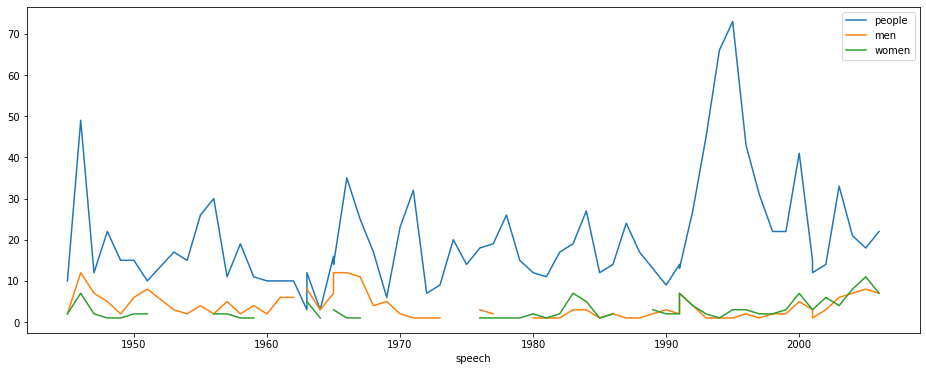

In [77]:
import matplotlib.pyplot as plt

cfd_df.set_index('speech').plot(figsize=(16,6))

## 5

☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: 
* `member_meronyms()`
* `part_meronyms()`
* `substance_meronyms()` 
* `member_holonyms()` 
* `part_holonyms()` 
* `substance_holonyms()`

## 6

☼ In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

## 7

☼ According to Strunk and White's Elements of Style, the word *however*, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: *However you advise him, he will probably do as he thinks best*. (http://www.bartleby.com/141/strunk3.html) 

Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

## 8

◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

## 9

◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in *Moby Dick and in Sense and Sensibility*?

## 10

◑ Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

## 11

◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

## 12

◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

## 13

◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

## 14

◑ Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

## 15.

◑ Write a program to find all words that occur at least three times in the Brown Corpus.

## 16.

◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

# 17.

◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

* use set theory notation to discuss this

## 18.

◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

## 19.

◑ Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

## 20.

◑ Write a function `word_freq()` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

# 21.

◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

## 22.

◑ Define a function `hedge(text)` which processes a text and produces a new version with the word 'like' between every third word.

## 23.

★ Zipf's Law: Let *f(w)* be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
    
1. Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
2. Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?
